<a href="https://colab.research.google.com/github/mazg-95/statistical-learning-2/blob/main/forward_propagation_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Igorando el sesgo/bias y asumiendo activación sigmoidal implementar la siguiente red neuronal en NumPy

https://gadictos.com/neural-network-pt1/
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [106]:
Wc1 = np.array([
   [0.9,0.3,0.2],
   [0.8,0.5,0.4],
   [0.1,0.6,0.7]
])

In [107]:
Wc2 = np.array([0.3,0.5,0.9])

In [108]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

### Forward-propagation(inferencia, prediccion, o estimacion)


In [109]:
H = np.matmul(X,Wc1)

In [110]:
X.shape

(4, 3)

In [111]:
Wc1.shape

(3, 3)

In [112]:
H.shape

(4, 3)

In [113]:
H

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [114]:
A = sigmoid(H)

In [115]:
A

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [116]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [117]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

In [118]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [119]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [120]:
y_aprox = f(g(X))

In [121]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

#### Orientado a objetos

In [122]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
      [0.9,0.3,0.2],
      [0.8,0.5,0.4],
      [0.1,0.6,0.7]  
    ])

    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1))
    print("Capa Intermedia: ")
    print(A)
    y_aprox = sigmoid(np.matmul(A,self.Wc2))
    return y_aprox

In [123]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)
print("Resultado: ", y_aprox, sep="\n")

Capa Intermedia: 
[[0.73105858 0.7109495  0.7109495 ]
 [0.94267582 0.95689275 0.95689275]
 [0.99972542 0.99932492 0.99908895]
 [0.9999925  0.99995892 0.99993228]]
Resultado: 
[0.77112013 0.83513309 0.84537273 0.8455238 ]


<img src="https://i.imgur.com/IDFRq5a.png">

[0.73105858 0.78583498 0.68997448]

In [124]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [0.8,0.2],
        [0.4,0.9],
        [0.3,0.5]    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1.T)) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print(A)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) # 1 fila por observacion,  1 unica salida [4,1]
    return y_aprox

In [125]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [126]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)
print("Resultado: ", y_aprox, sep="\n")

[[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]]
Resultado: 
[0.77438027 0.80026216 0.84194007 0.84485948]


In [127]:
y_aprox

array([0.77438027, 0.80026216, 0.84194007, 0.84485948])

Para la entrada (1,1) la variable latente con mayor presencia es la segunda con 0.79

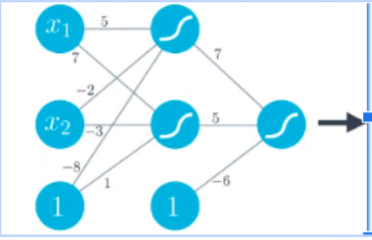

In [128]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [5, -2, -8],
        [7,-3, 1],    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([7,5,-6])

  def add_bias(self, X):
    return np.concatenate((X, np.ones(X.shape[0]).reshape(-1,1)), axis=1)

  def forward_propagation(self,X):
    X_b = self.add_bias(X)
    A = sigmoid(np.matmul(X_b,self.Wc1.T)) 
    A_b = self.add_bias(A)
    print("Capa Intermedia: ", A, sep="\n")
    y_aprox = sigmoid(np.matmul(A_b,self.Wc2)) 
    return y_aprox



In [129]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])



In [130]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)
print("Resultado: ", y_aprox, sep="\n")

Capa Intermedia: 
[[6.69285092e-03 9.93307149e-01]
 [9.11051194e-04 8.80797078e-01]
 [8.80797078e-01 9.99999168e-01]
 [9.99664650e-01 1.00000000e+00]]
Resultado: 
[0.27158134 0.16943494 0.99432264 0.99752158]


Para la entrada 1,1 la caracteristica intermedia con mayor presencia es la de la primera neurona. Con 9.93e-01.

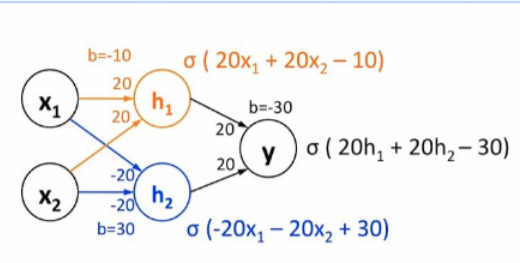

In [145]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [20, 20, -10],
        [-20,-20, 30],    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([20,20,-30])

  def add_bias(self, X):
    return np.concatenate((X, np.ones(X.shape[0]).reshape(-1,1)), axis=1)

  def forward_propagation(self,X):
    X_b = self.add_bias(X)
    A = sigmoid(np.matmul(X_b,self.Wc1.T)) 
    A_b = self.add_bias(A)
    print("Capa Intermedia: ", A, sep="\n")
    y_aprox = sigmoid(np.matmul(A_b,self.Wc2)) 
    return y_aprox, A



In [133]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,0],
      [0,1],
      [0,0],
])



In [147]:
red = RedNeuronal()
y_aprox, A = red.forward_propagation(X)
res = np.round(y_aprox)
print("Resultado: ", res, sep="\n")

Capa Intermedia: 
[[1.00000000e+00 4.53978687e-05]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [4.53978687e-05 1.00000000e+00]]
Resultado: 
[0. 1. 1. 0.]


Text(0.5, 1.0, 'XOR Hidden Layer')

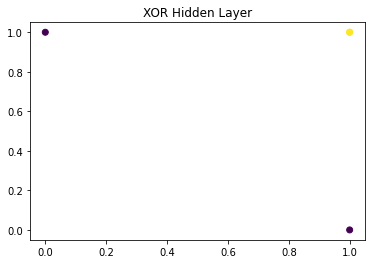

In [156]:
plt.scatter(A[:,0], A[:,1], c=res)
plt.title('XOR Hidden Layer')

Podemos observar que la variable latente en esta red  hace una separacion de la presencia o ausencia de valores True en ambas variables de entrada. Ante la presencia de 0s en ambas variables de entrada una neurona se activa mas que otras. Y en caso den tener ambos 1s en las variables de entrada es la otra neurona la que se activa. En caso de no detectar los dos escenarios descritos anteriormente ninguna neurona se activa. Por lo que la representacion intermedia de este modelo separa linealmente estos dos casos.

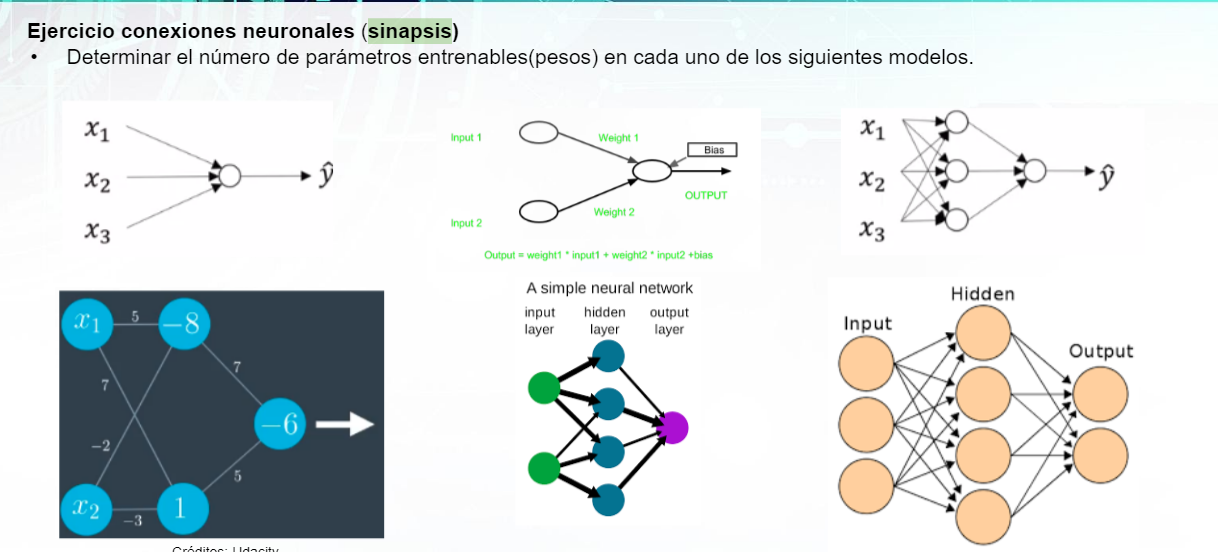